<a href="https://colab.research.google.com/github/Ananthzeke/Globalcert/blob/main/intern_task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
ls drive/MyDrive/Image*

'drive/MyDrive/Image Cleaning-20220927T131432Z-001.zip'


In [89]:
import tensorflow as tf
import numpy as np
import  matplotlib.pyplot as plt 

#### Dataset directories

In [90]:
data_train='drive/MyDrive/dataset/internship/Image Cleaning/train'
data_train_cleaned='drive/MyDrive/dataset/internship/Image Cleaning/train_cleaned'
data_test='drive/MyDrive/dataset/internship/Image Cleaning/test'

#### Preprocessing the images
      - converting the images to tensors.
      - Normalizing the tensors in the range of 0 to 1

In [91]:
train_x=tf.keras.utils.image_dataset_from_directory(data_train,label_mode=None,shuffle=False,image_size=(420,540),color_mode='rgb',batch_size=10).map(lambda x:x/255)
train_y=tf.keras.utils.image_dataset_from_directory(data_train_cleaned,label_mode=None,shuffle=False,image_size=(420,540),color_mode='rgb',batch_size=10).map(lambda x:x/255)
test=tf.keras.utils.image_dataset_from_directory(data_test,label_mode=None,shuffle=False,image_size=(420,540),color_mode='rgb',batch_size=10).map(lambda x:x/255)

Found 144 files belonging to 1 classes.
Found 144 files belonging to 1 classes.
Found 72 files belonging to 1 classes.


#### Visualizing the dataset

(-0.5, 539.5, 419.5, -0.5)

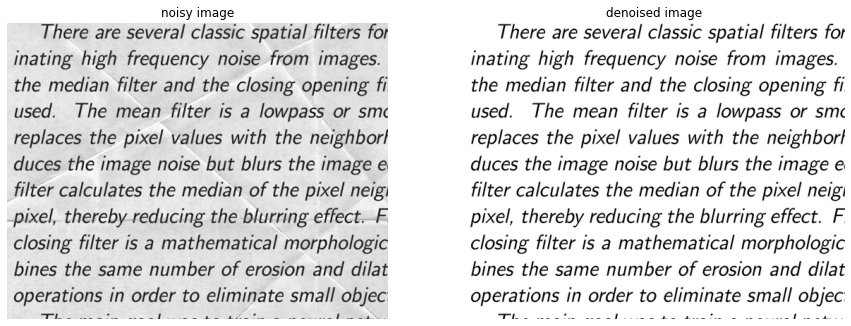

In [92]:
fig = plt.figure(figsize=(15, 7))
plt.subplot(121,title='noisy image')
plt.imshow(next(iter(train_x))[1]) #noisy image
plt.axis('off')
plt.subplot(122,title="denoised image")
plt.imshow(next(iter(train_y))[1]) #denoised image
plt.axis('off')

In [93]:
train=tf.data.Dataset.zip((train_x,train_y)) # zipping Noisy and cleaned images
train

<ZipDataset element_spec=(TensorSpec(shape=(None, 420, 540, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 420, 540, 3), dtype=tf.float32, name=None))>

#### Model

In [106]:
autoencoder=tf.keras.Sequential([
    tfl.Conv2D(16, (3,3),input_shape=(420, 540, 3), activation='relu', padding='same', strides=2),
    tfl.Conv2D(8, (3,3), activation='relu', padding='same', strides=2),
    tfl.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'), 
    tfl.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'), 
    tfl.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')

])
autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(),metrics=['accuracy'])

In [122]:
autoencoder.summary() #architecture

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 210, 270, 16)      448       
                                                                 
 conv2d_28 (Conv2D)          (None, 105, 135, 8)       1160      
                                                                 
 conv2d_transpose_18 (Conv2D  (None, 210, 270, 8)      584       
 Transpose)                                                      
                                                                 
 conv2d_transpose_19 (Conv2D  (None, 420, 540, 16)     1168      
 Transpose)                                                      
                                                                 
 conv2d_29 (Conv2D)          (None, 420, 540, 1)       145       
                                                                 
Total params: 3,505
Trainable params: 3,505
Non-train

In [107]:
history=autoencoder.fit(train,epochs=20)

Epoch 1/20
15/15 [==============================] - 2s 104ms/step - loss: 0.2098 - accuracy: 0.6170
Epoch 2/20
15/15 [==============================] - 2s 104ms/step - loss: 0.1337 - accuracy: 0.6479
Epoch 3/20
15/15 [==============================] - 2s 103ms/step - loss: 0.0672 - accuracy: 0.6479
Epoch 4/20
15/15 [==============================] - 3s 146ms/step - loss: 0.0671 - accuracy: 0.6479
Epoch 5/20
15/15 [==============================] - 3s 157ms/step - loss: 0.0629 - accuracy: 0.6479
Epoch 6/20
15/15 [==============================] - 2s 118ms/step - loss: 0.0611 - accuracy: 0.6479
Epoch 7/20
15/15 [==============================] - 2s 106ms/step - loss: 0.0585 - accuracy: 0.6479
Epoch 8/20
15/15 [==============================] - 2s 106ms/step - loss: 0.0541 - accuracy: 0.6479
Epoch 9/20
15/15 [==============================] - 2s 105ms/step - loss: 0.0485 - accuracy: 0.6479
Epoch 10/20
15/15 [==============================] - 2s 109ms/step - loss: 0.0438 - accuracy: 0.6479

In [105]:
next(iter(train_y)).shape

TensorShape([32, 256, 256, 3])

In [102]:
predicted=autoencoder.predict(train_x)[0].reshape(420,-1)
actual=next(iter(train_y))[0]

(-0.5, 539.5, 419.5, -0.5)

<Figure size 432x288 with 0 Axes>

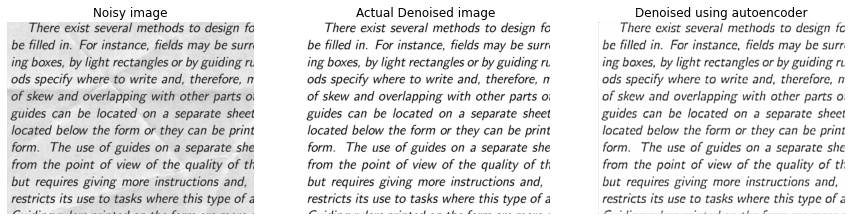

In [116]:
fig = plt.figure(figsize=(15, 7))
plt.subplot(131,title="Noisy image")
plt.imshow(next(iter(train_x))[0]) # noisy image
plt.axis('off')
plt.subplot(132,title="Actual Denoised image")
plt.imshow(actual) #denoised image
plt.axis('off')
plt.subplot(133,title='Denoised using autoencoder')
plt.imshow(predicted,cmap='gray') 
plt.axis('off')

In [117]:
predicted=autoencoder.predict(test)[0].reshape(420,-1)
actual=next(iter(test))[0]

(-0.5, 539.5, 419.5, -0.5)

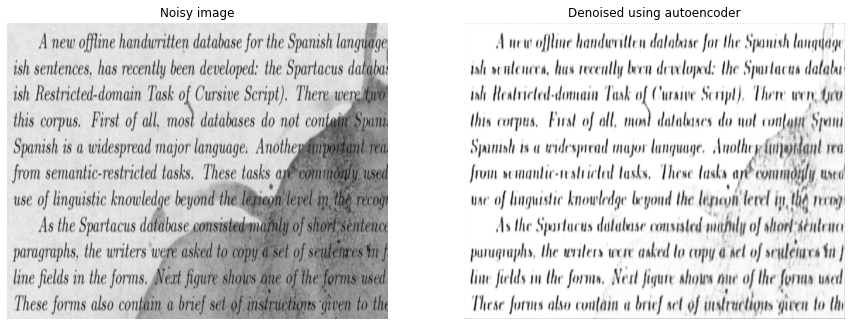

In [120]:
fig = plt.figure(figsize=(15, 7))
plt.subplot(121,title="Noisy image")
plt.imshow(actual) # noisy image
plt.axis('off')
plt.subplot(122,title='Denoised using autoencoder')
plt.imshow(predicted,cmap='gray') 
plt.axis('off')

In [108]:
history=history.history

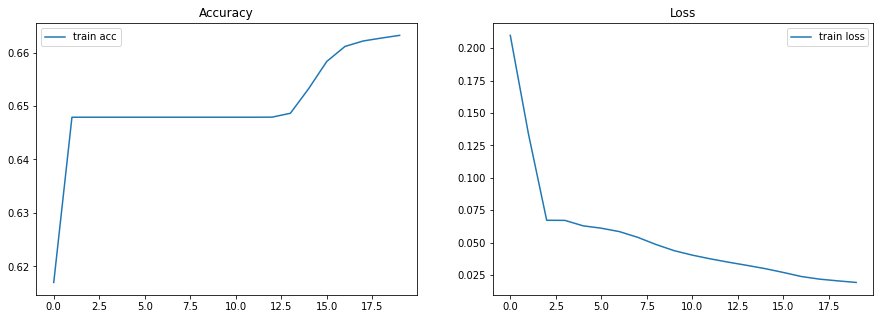

In [112]:
 #accuracy curves
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Accuracy")
plt.plot(history["accuracy"],label="train acc")
plt.legend()
# loss curves
plt.subplot(122)
plt.title("Loss")
plt.plot(history["loss"],label="train loss")
plt.legend()

plt.show()